<a href="https://colab.research.google.com/github/JinkyoHan/JinkyoHan/blob/main/%ED%95%B4%EC%96%91%ED%8C%8C_HW3_Prob5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pillow

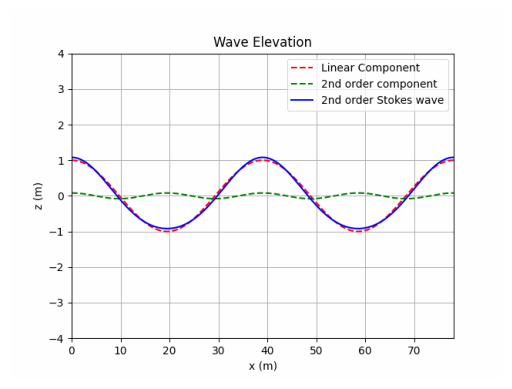

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from matplotlib.animation import FuncAnimation
from PIL import Image

# 주어진 파라미터들
T = 5  # 주기
h = 100  # 수심
A = 1  # 진폭

omega = 2*np.pi/T
g = 9.81  # 중력가속도

fun = lambda k: omega**2 - g*k*np.tanh(k*h)
k = fsolve(fun, omega**2/g)[0]

x = np.linspace(0, 2*2*np.pi/k, 1000)
t_vals = np.linspace(0, T, T*30)

fig, ax = plt.subplots()
line1, = ax.plot(x, np.zeros_like(x), 'r--', label='Linear Component')
line2, = ax.plot(x, np.zeros_like(x), 'g--', label='2nd order component')
line3, = ax.plot(x, np.zeros_like(x), 'b', label='2nd order Stokes wave')
ax.legend()
ax.set_xlabel('x (m)')
ax.set_ylabel('z (m)')
ax.set_title('Wave Elevation')
ax.set_xlim([0, 2*2*np.pi/k])
ax.set_ylim([-4, 4])
ax.grid(True)

def update(t):
    eta = A * np.cos(k*x - omega*t)
    eta_2 = (A**2 * k * np.cos(2*(k*x-omega*t))) * (3-(np.tanh(k*h))**2) / (4*(np.tanh(k*h))**3)
    eta_sum = eta + eta_2
    line1.set_ydata(eta)
    line2.set_ydata(eta_2)
    line3.set_ydata(eta_sum)
    return line1, line2, line3

ani = FuncAnimation(fig, update, t_vals, blit=True)

# GIF로 저장
filename = "wave_animation_{}_{}_{}.gif".format(T, h, A)

ani.save(filename, writer="pillow", fps=30)
plt.close()

# GIF를 Colab에 표시
with Image.open(filename) as img:
    plt.imshow(img)
    plt.axis('off')  # 축 없애기
    plt.show()
